In [1]:
import mlflow

In [2]:
mlflow.set_tracking_uri("https://dagshub.com/Shubhamraut97/experemntracking.mlflow")

In [3]:
import dagshub
dagshub.init(repo_owner='Shubhamraut97', repo_name='experemntracking', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

/Users/shubham/Desktop/sentimentanalysis/venv/lib/python3.12/site-packages/rich/live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=c866bf73-d4a0-4d8e-9b72-a11dac102666&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=475c79a1a4facf0a5882af1be3096fca316381985f5d131948a6e164b905efd5




Accessing as Shubhamraut97

Initialized MLflow to track repo "Shubhamraut97/experemntracking"

Repository Shubhamraut97/experemntracking initialized!

In [4]:
with mlflow.start_run():
    mlflow.log_param("param1", 5)
    mlflow.log_metric("metric1", 0.85)

🏃 View run painted-sponge-388 at: https://dagshub.com/Shubhamraut97/experemntracking.mlflow/#/experiments/0/runs/a9bbd095a40e42f6bacc1b7f03a20281
🧪 View experiment at: https://dagshub.com/Shubhamraut97/experemntracking.mlflow/#/experiments/0


In [5]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Reddit_Data.csv')

In [7]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
df.dropna(inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [11]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [13]:
stop_words = set(stopwords.words('english')) - {'not', 'no', 'however', 'but', 'yet', 'still', 'although'}
lemmatizer = WordNetLemmatizer()


In [18]:
def preprocess_text(text):
    text = text.lower()
    text= text.strip()
    text=re.sub(r'\n','',text)
    text=re.sub(r'[^A-Za-z0-9\s!?.,]','',text)
    stop_words = set(stopwords.words('english')) - {'not','no','however','but','yet','still','although'}
    text= ' '.join([word for word in text.split() if word not in stop_words])
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text




In [19]:
df['clean_comment'] = df['clean_comment'].apply(preprocess_text)

In [20]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [21]:
df['clean_comment'][0]

'family mormon never tried explain still stare puzzled time time like kind strange creature nonetheless come admire patience calmness equanimity acceptance compassion developed thing buddhism teach'

In [22]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [24]:
vecotrizer= CountVectorizer(max_features=5000)

In [25]:
x = vecotrizer.fit_transform(df['clean_comment']).toarray()
y = df['category']

In [26]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(36793, 5000))

In [27]:
y

0        1
1        1
2       -1
3        0
4        1
        ..
37244    0
37245    1
37246    0
37247    1
37248    0
Name: category, Length: 36793, dtype: int64

In [28]:
mlflow.set_tracking_uri("https://dagshub.com/Shubhamraut97/experemntracking.mlflow")

In [29]:
mlflow.set_experiment("Reddit_Sentiment_Analysis base model")

2025/07/26 18:50:56 INFO mlflow.tracking.fluent: Experiment with name 'Reddit_Sentiment_Analysis base model' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/1c7c1fff922b46c1872ef25b43e1e31e', creation_time=1753535156255, experiment_id='1', last_update_time=1753535156255, lifecycle_stage='active', name='Reddit_Sentiment_Analysis base model', tags={}>

🏃 View run abrasive-lamb-302 at: https://dagshub.com/Shubhamraut97/experemntracking.mlflow/#/experiments/1/runs/2b6d342a1dd8418dbace891b693000f9
🧪 View experiment at: https://dagshub.com/Shubhamraut97/experemntracking.mlflow/#/experiments/1
accuracy_score: 0.6513113194727544


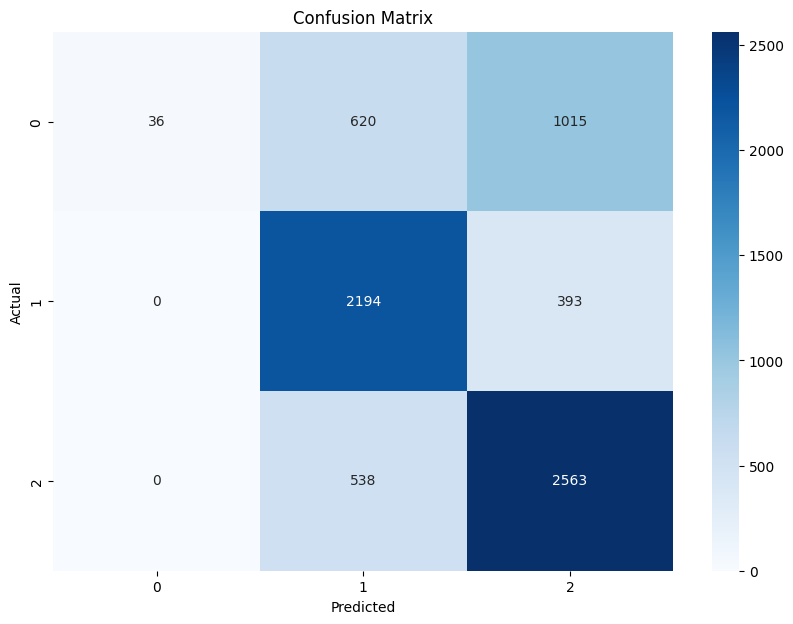

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
with mlflow.start_run() as run:
    mlflow.set_tag('mlflow.runname', 'Reddit_Sentiment_Analysis base model')
    mlflow.set_tag('experiment_type','baseline')
    mlflow.set_tag('model_type', 'RandomForestClassifier')
    mlflow.set_tag("description", "Baseline model for Reddit sentiment analysis using Random Forest Classifier")
    mlflow.log_param('vectorizer', 'CountVectorizer(max_features=5000)')
    mlflow.log_param('max_features', vecotrizer.max_features)
    n_estimators = 150
    max_depth = 15
    mlflow.log_param('n_estimators', n_estimators)
    mlflow.log_param('max_depth', max_depth)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_metric('accuracy', accuracy)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    for label, metrics in class_report.items():
        if isinstance(metrics, dict):
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f'{label}_{metric_name}', metric_value)
    confusion = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('confusion_matrix.png')
    mlflow.log_artifact('confusion_matrix.png')
    df.to_csv('processed_data.csv', index=False)
    mlflow.log_artifact('processed_data.csv')
print(f"accuracy_score: {accuracy}")


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.02      0.04      1671
           0       0.65      0.85      0.74      2587
           1       0.65      0.83      0.72      3101

    accuracy                           0.65      7359
   macro avg       0.77      0.57      0.50      7359
weighted avg       0.73      0.65      0.57      7359



In [34]:
df.to_csv('processed_data.csv', index=False)

In [35]:
pd.read_csv('processed_data.csv')

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1
...,...,...
36788,jesus,0
36789,kya bhai pure saal chutiya banaya modi aur jab...,1
36790,downvote karna tha par upvote hogaya,0
36791,haha nice,1
